<a href="https://colab.research.google.com/github/asmaa199/linear-regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Prepare Dataset

In [27]:
features = ([10.0, 20.0,  30.0,  40.0,  50.0,  60.0,  70.0,  80.0,  90.0, 100.0, 110.0, 120.0])
labels   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# Functions Definition

In [14]:
def create_model(learning_rate):
  #add a sequential model
  model = tf.keras.models.Sequential()

  #topography of the model
  model.add(tf.keras.layers.Dense(units=1, 
                                   input_shape=(1,)))
  #compile the topography to an executable code
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model 
  


In [5]:
def train_model(model, feature, label, epochs, batch_size):
  #feed data into the model & train for specified no of epochs
  history = model.fit(x=feature, y=label, batch_size=batch_size, epochs = epochs)

  #get the weights
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  #list epochs separate from rest of history
  epochs = history.epoch

  #history of each epoch
  hist = pd.DataFrame(history.history)

  #get root mean squared error
  RSME = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, RSME

In [19]:
def plot_model(trained_weight, trained_bias, feature, label):
  #labelling feature = x-axis, label = y-axis
  plt.xlabel("feature")
  plt.ylabel("label")

  #plot feature vs label
  plt.scatter(feature, label)

  #line represnting the model
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

In [7]:
def plot_loss_curve(epochs, RSME):
  
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


# specify hyperparameters & plotting


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/500
1/1 [==============================] - 0s 270ms/step - loss: 20966.7793 - root_mean_squared_error: 144.7991
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 20290.2363 - root_mean_squared_error: 142.4438
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 19810.1191 - root_mean_squared_error: 140.7484
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 19414.4062 - root_mean_squared_error: 139.3356
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 19067.7168 - root_mean_squared_error: 138.0859
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 18753.6895 - root_mean_squared_error: 136.9441
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 18463.2168 - root_mean_squared_error: 135.8794
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 18190.6465 - root_mean_squared_error: 134.8727
Epoch 9/500
1/1 [==============================] - 0s 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


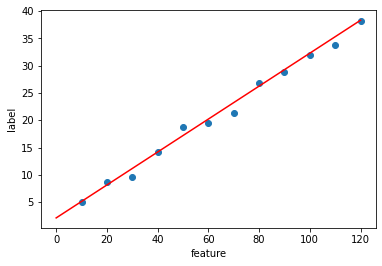

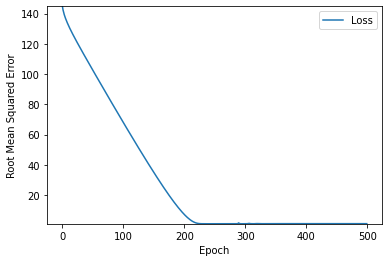

In [28]:
learning_rate=0.01
epochs=500
my_batch_size=12

model = create_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(model, features, 
                                                         labels, epochs,
                                                         my_batch_size)
plot_model(trained_weight, trained_bias, features, labels)
plot_loss_curve(epochs, rmse)